<a href="https://colab.research.google.com/github/SakibHussen/Individual_Project/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plot
from matplotlib import style


In [74]:
titanic_test=pd.read_csv('/content/sample_data/test.csv')
titanic_train=pd.read_csv('/content/sample_data/train.csv')

In [75]:
titanic_test.shape

(418, 11)

In [76]:
titanic_train.shape

(891, 12)

In [77]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [79]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [80]:
titanic_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Cleaning the data

In [81]:
#filling all the null values of age
titanic_train['Age'].fillna(titanic_train['Age'].median(),inplace=True)
titanic_test['Age'].fillna(titanic_test['Age'].median(),inplace=True)


<ipython-input-81-80e2e0bf4495>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train['Age'].fillna(titanic_train['Age'].median(),inplace=True)
<ipython-input-81-80e2e0bf4495>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [82]:
#filing the embarked column with the most common port
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0],inplace=True)
titanic_test['Embarked'].fillna(titanic_test['Embarked'].mode()[0],inplace=True)

<ipython-input-82-b165c47b8cce>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0],inplace=True)
<ipython-input-82-b165c47b8cce>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [83]:
#calculating the missing values
titanic_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [84]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [85]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
#detailed look on missing data
total=titanic_train.isnull().sum().sort_values(ascending=False)
percent_1= titanic_train.isnull().sum()/titanic_train.isnull().count()*100
percent_2= (round(percent_1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data

,Total,%
Cabin,687,77.1
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0


In [87]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<ipython-input-88-8e0c9530939c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18, label=survived,ax=axes[0],kde=False)
<ipython-input-88-8e0c9530939c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(women[women['Survived']==0].Age.dropna(),

Text(0.5, 1.0, 'Male')

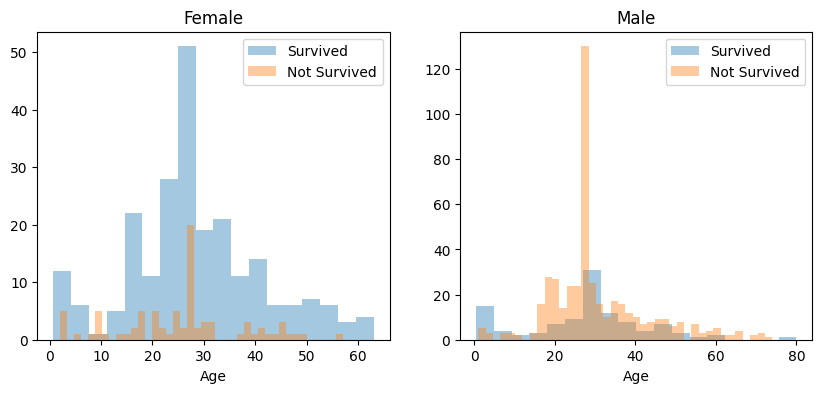

In [88]:
survived='Survived'
not_survived='Not Survived'
fig,axes=plot.subplots(nrows=1,ncols=2,figsize=(10,4))
women=titanic_train[titanic_train['Sex']=='female']
men=titanic_train[titanic_train['Sex']=='male']
ax=sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18, label=survived,ax=axes[0],kde=False)
ax=sns.distplot(women[women['Survived']==0].Age.dropna(),bins=40, label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')
ax=sns.distplot(men[men['Survived']==1].Age.dropna(),bins=18, label=survived,ax=axes[1],kde=False)
ax=sns.distplot(men[men['Survived']==0].Age.dropna(),bins=40, label=not_survived,ax=axes[1],kde=False)
ax.legend()
ax.set_title('Male')



## Embarked,Places,and Sex

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


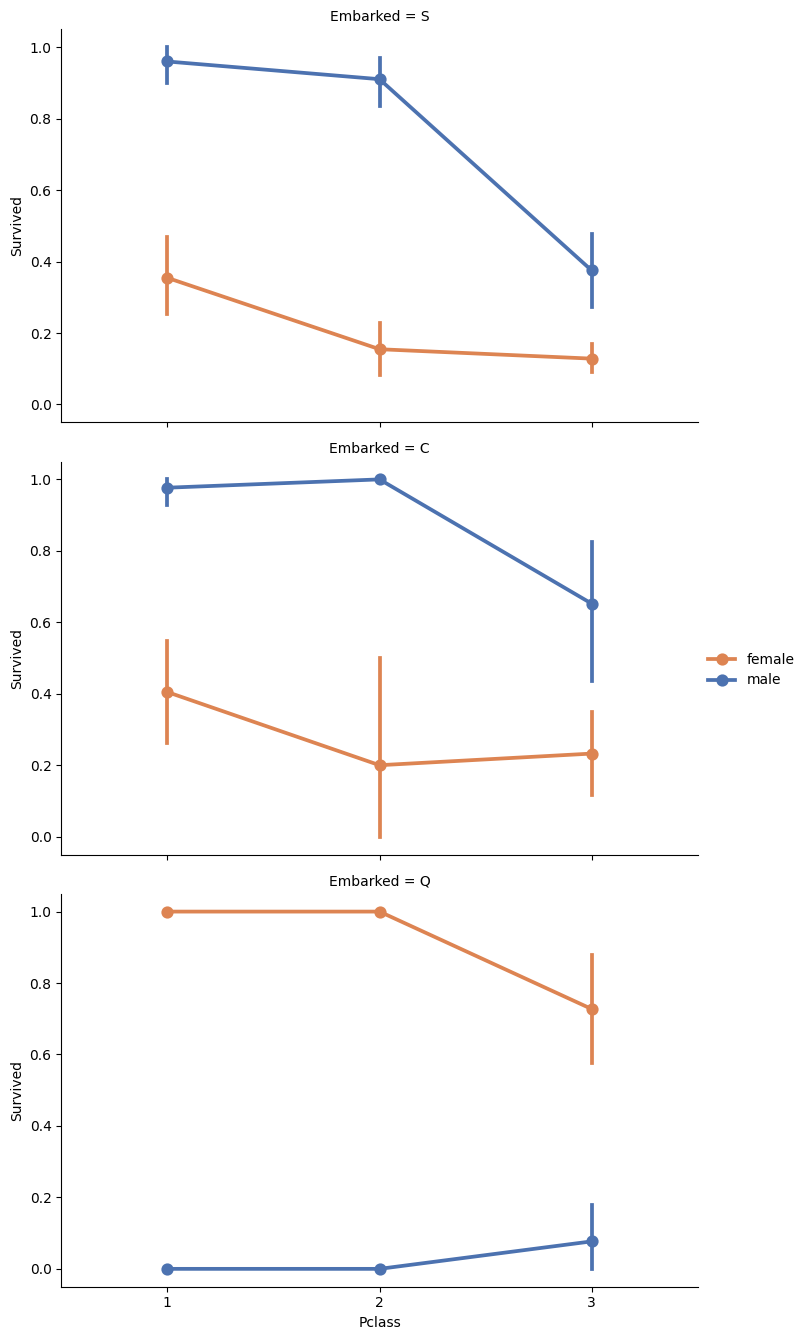

In [89]:
FacetGrid = sns.FacetGrid(titanic_train, row='Embarked',height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
FacetGrid.add_legend()

<Axes: xlabel='Pclass', ylabel='Survived'>

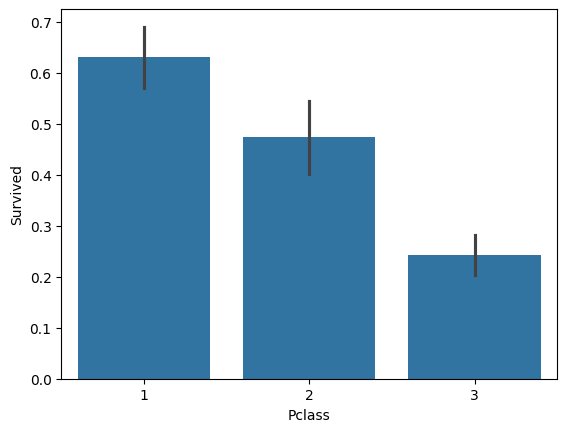

In [90]:
sns.barplot(x='Pclass',y='Survived',data=titanic_train)

#### As we go down to third class survival rate also goes down

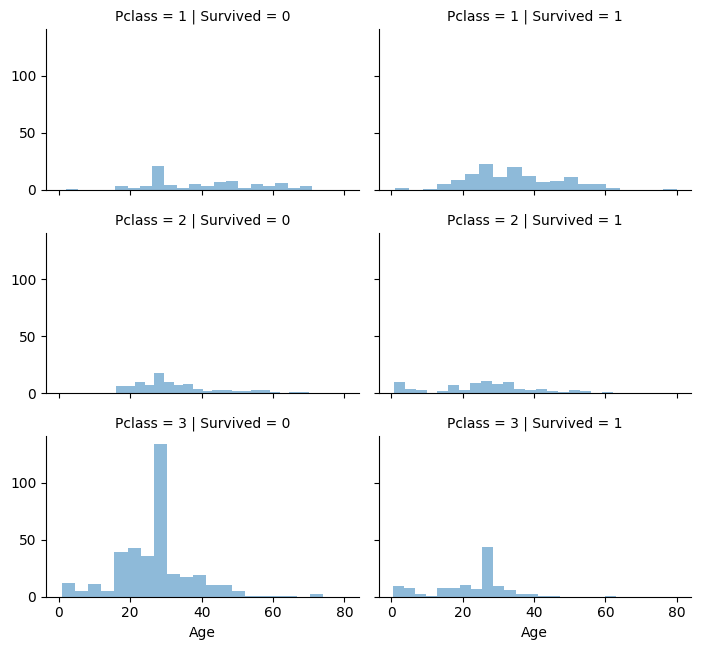

In [91]:
grid=sns.FacetGrid(titanic_train,col='Survived',row='Pclass',height=2.2,aspect=1.6)
grid.map(plot.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

In [92]:
data=[titanic_train,titanic_test]
for dataset in data:
  dataset['relatives']=dataset['SibSp']+dataset['Parch']
  dataset.loc[dataset['relatives']>0,'not_alone']=0
  dataset.loc[dataset['relatives']==0,'not_alone']=1
  dataset['not_alone']=dataset['not_alone'].astype(int)
titanic_train['not_alone'].value_counts()

,count
not_alone,
1,537
0,354


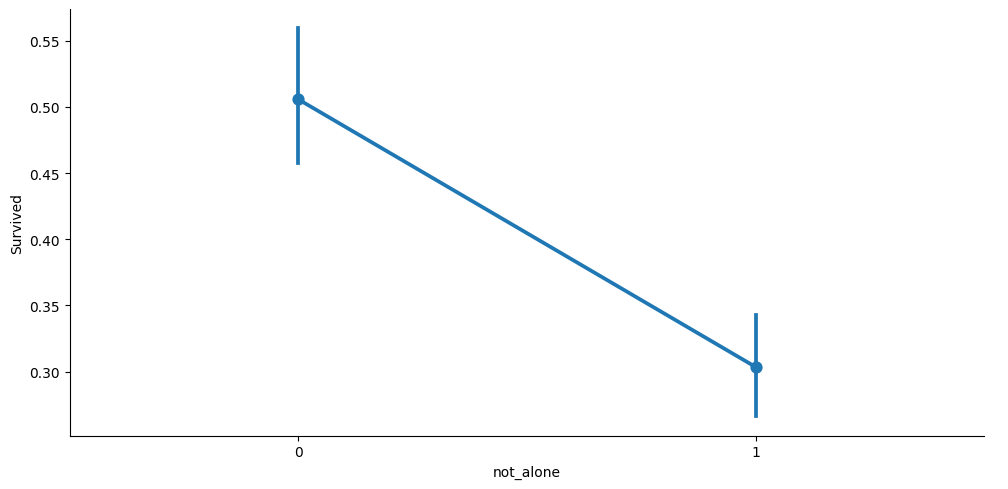

In [93]:
axes = sns.catplot(x='not_alone', y='Survived', data=titanic_train, kind='point', aspect=2, height=5)

# Data preprocessing


In [94]:
titanic_train=titanic_train.drop(['PassengerId'],axis=1)

In [95]:
import re
deck={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'U':8}
data=[titanic_train,titanic_test]
for dataset in data:
  dataset['Cabin']=dataset['Cabin'].fillna('U0')
  dataset['Deck']=dataset['Cabin'].map(lambda x:re.compile("([a-zA-Z]+)").search(x).group())
  dataset['Deck']=dataset['Deck'].map(deck)
  dataset['Deck']=dataset['Deck'].fillna(0)
  dataset['Deck']=dataset['Deck'].astype(int)



In [96]:
#Droping the cabin feature
titanic_train=titanic_train.drop(['Cabin'],axis=1)
titanic_test=titanic_test.drop(['Cabin'],axis=1)

In [97]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [98]:
#Converting fare float type to int
data=[titanic_train,titanic_test]
for dataset in data:
  dataset['Fare']=dataset['Fare'].fillna(0)
  dataset['Fare']=dataset['Fare'].astype(int)

In [99]:
#Now we will extract title since it can provide us with information regarding social status
data=[titanic_train, titanic_test]
titles={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}
for dataset in data:
  #extract title
  dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
  #replace titles with a more common title
  dataset['Title']=dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
  dataset['Title']=dataset['Title'].replace('Mlle','Miss')
  dataset['Title']=dataset['Title'].replace('Ms','Miss')
  dataset['Title']=dataset['Title'].replace('Mme','Mrs')
  dataset['Title']=dataset['Title'].map(titles)
  dataset['Title']=dataset['Title'].fillna(0)


In [100]:
#drop the name column
titanic_train=titanic_train.drop(['Name'],axis=1)
titanic_test=titanic_test.drop(['Name'],axis=1)

In [101]:
#Converting Sex features into numeric
genders={'male':0,'female':1}
data=[titanic_train,titanic_test]
for dataset in data:
  dataset['Sex']=dataset['Sex'].map(genders)

In [102]:
#removing ticket
titanic_train=titanic_train.drop(['Ticket'],axis=1)

In [103]:
#Converting Embarked class into numeric
ports={'S':0,'C':1,'Q':2}
data=[titanic_train,titanic_test]
for dataset in data:
  dataset['Embarked']=dataset['Embarked'].map(ports)

In [104]:
titanic_train['Age'].head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [105]:
data=[titanic_train,titanic_test]
for dataset in data:
  dataset['Age']=dataset['Age'].astype(int)
  dataset.loc[dataset['Age']<=11,'Age']=0
  dataset.loc[(dataset['Age']>11) & (dataset['Age']<=18),'Age']=1
  dataset.loc[(dataset['Age']>18) & (dataset['Age']<=22),'Age']=2
  dataset.loc[(dataset['Age']>22) & (dataset['Age']<=27),'Age']=3
  dataset.loc[(dataset['Age']>27) & (dataset['Age']<=33),'Age']=4
  dataset.loc[(dataset['Age']>33) & (dataset['Age']<=40),'Age']=5
  dataset.loc[(dataset['Age']>40) & (dataset['Age']<=66),'Age']=6
  dataset.loc[dataset['Age']>66,'Age']=6




In [106]:
titanic_train['Age'].value_counts()

,count
Age,
4,303
6,148
3,106
5,103
2,92
1,71
0,68


In [107]:
#removing passenger id
titanic_train=titanic_train.drop(['PassengerId'],axis=1)


KeyError: "['PassengerId'] not found in axis"

In [108]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1


In [112]:
#using the qcut function on Fare
data=[titanic_train,titanic_test]
for dataset in data:
  dataset.loc[dataset['Fare']<=7.91,'Fare']=0
  dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454),'Fare']=1
  dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31),'Fare']=2
  dataset.loc[(dataset['Fare']>31) & (dataset['Fare']<=99),'Fare']=3
  dataset.loc[(dataset['Fare']>99) & (dataset['Fare']<=250),'Fare']=4
  dataset.loc[dataset['Fare']>250,'Fare']=5
  dataset['Fare']=dataset['Fare'].astype(int)





In [113]:
titanic_train['Fare'].value_counts()

,count
Fare,
0,241
2,223
1,216
3,158
4,44
5,9


In [119]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class
0,0,3,0,2,1,0,0,0,1,0,8,1,6
1,1,1,1,5,1,0,3,1,1,0,3,3,5
2,1,3,1,3,0,0,0,0,0,1,8,2,9
3,1,1,1,5,1,0,3,0,1,0,3,3,5
4,0,3,0,5,0,0,1,0,0,1,8,1,15


In [121]:
data=[titanic_train, titanic_test]
for dataset in data:
  dataset['Age_Class']=dataset['Age']*dataset['Pclass']
for dataset in data:
  dataset['Fare_Per_Person']=dataset['Fare']/(dataset['relatives']+1)
  dataset['Fare_Per_Person']=dataset['Fare_Per_Person'].astype(int)

In [122]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1


# Building Machine learning Model

In [131]:
X_train=titanic_train.drop('Survived',axis=1)
Y_train=titanic_train['Survived']
X_test=titanic_test.drop('PassengerId',axis=1).copy()

In [136]:
X_test.drop('Ticket',axis=1,inplace=True)

In [137]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,5,1,0,3,0,1,0,3,3,5,1
4,3,0,5,0,0,1,0,0,1,8,1,15,1


In [138]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,3,0,5,0,0,0,2,0,1,8,1,15,0
1,3,1,6,1,0,0,0,1,0,8,3,18,0
2,2,0,6,0,0,1,2,0,1,8,1,12,1
3,3,0,3,0,0,1,0,0,1,8,1,9,1
4,3,1,2,1,1,1,0,2,0,8,3,6,0


### Stochastic Gradient Descent(SGD)

In [139]:
#Implimenting SGD
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_train,Y_train)



SGDClassifier()

In [142]:
Y_pred=sgd.predict(X_test)
sgd_score=round(sgd.score(X_train,Y_train)*100,2)
sgd_score


71.83

### Random forest

In [144]:
#implimenting random forest
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_pred=random_forest.predict(X_test)
random_forest.score(X_train,Y_train)
acc_random_forest=round(random_forest.score(X_train,Y_train)*100,2)
acc_random_forest

92.26

### Logistic Regression

In [145]:
# Implimenting logistic regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
acc_log=round(logreg.score(X_train,Y_train)*100,2)
acc_log

81.93

### K Nearest Neighbour

In [146]:
#Implimenting KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
acc_knn=round(knn.score(X_train,Y_train)*100,2)
acc_knn

86.08

### Naive Nayes

In [149]:
#Implimenting Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian=GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred=gaussian.predict(X_test)
acc_gaussian=round(gaussian.score(X_train,Y_train)*100,2)
acc_gaussian

77.55

### Perceptron

In [150]:
#Implimenting perception
from sklearn.linear_model import Perceptron
perceptron=Perceptron()
perceptron.fit(X_train,Y_train)
Y_pred=perceptron.predict(X_test)
acc_perceptron=round(perceptron.score(X_train,Y_train)*100,2)
acc_perceptron

72.84

### Linear Support Vector Machine

In [153]:
#Implimenting support vector machine
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
acc_svc=round(svc.score(X_train,Y_train)*100,2)
acc_svc


82.72

### Decission Tree

In [155]:
#implementing decision tree
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred=decision_tree.predict(X_test)
acc_decision_tree=round(decision_tree.score(X_train,Y_train)*100,2)
acc_decision_tree

92.26

In [159]:
#Finding the best model
results= pd.DataFrame({
    'Model':['Support Vector Machines','KNN','Logistic Regression','Random Forest','Naive Bayes','Perceptron','Linear SVC','Decision Tree'],
    'Score':[acc_svc,acc_knn,acc_log,acc_random_forest,acc_gaussian,acc_perceptron,acc_svc,acc_decision_tree]
})
results_df=results.sort_values(by='Score',ascending=False)
results_df=results_df.set_index('Score')
results_df.head(9)


,Model
Score,
92.26,Random Forest
92.26,Decision Tree
86.08,KNN
82.72,Support Vector Machines
82.72,Linear SVC
81.93,Logistic Regression
77.55,Naive Bayes
72.84,Perceptron


### K fold Cross Validation

In [160]:
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier(n_estimators=100)
scores=cross_val_score(rf,X_train,Y_train,cv=10,scoring='accuracy')
print('Scores:',scores)
print('Mean:',scores.mean())
print('Standard Deviation:',scores.std())

Scores: [0.77777778 0.84269663 0.75280899 0.87640449 0.86516854 0.88764045
 0.83146067 0.76404494 0.87640449 0.83146067]
Mean: 0.8305867665418226
Standard Deviation: 0.04697202624351402


In [162]:
#Feature Importance
import numpy as np
importances=pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Sex,0.194
Title,0.182
Age_Class,0.088
Pclass,0.082
Deck,0.082
Age,0.073
Fare,0.071
relatives,0.063
Embarked,0.052


<Axes: xlabel='feature'>

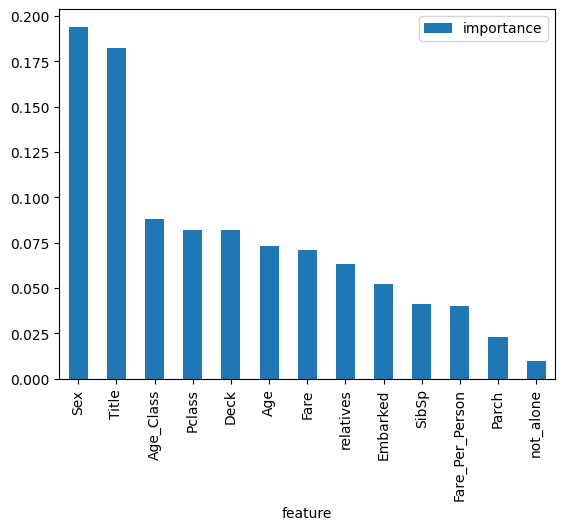

In [163]:
importances.plot.bar()

In [164]:
#Removing not_alone and Parch
titanic_train=titanic_train.drop(['not_alone','Parch'],axis=1)
titanic_test=titanic_test.drop(['not_alone','Parch'],axis=1)

In [170]:
#Training random forest again
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)
Y_pred=random_forest.predict(X_test)
random_forest.score(X_train,Y_train)
acc_random_forest=round(random_forest.score(X_train,Y_train)*100,2)
acc_random_forest

92.26

In [172]:
#Using out-of bag sample
random_forest.oob_score


False

### Hyperparameter Tuning

In [177]:
#implimentig grid search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_features': ['sqrt', 'log2', None],  # Valid options
    'max_depth': [None, 10, 20],  # Tree depth
    'min_samples_split': [2, 5, 10]  # Minimum samples for split
}
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_

In [178]:
best_params

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 50}

In [180]:
rf=RandomForestClassifier(n_estimators=50,min_samples_split=10,max_features='sqrt',max_depth=20,criterion="gini")
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
acc_random_forest=round(rf.score(X_train,Y_train)*100,2)
acc_random_forest

89.11

In [181]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions=cross_val_predict(rf,X_train,Y_train,cv=3)
confusion_matrix(Y_train,predictions)

array([[485,  64],
       [ 94, 248]])

In [188]:
from sklearn.metrics import precision_score,recall_score
print("Precission:", precision_score(Y_train,predictions))
print("Recall:", recall_score(Y_train,predictions))


Precission: 0.7948717948717948
Recall: 0.7251461988304093


79% of time is our model predict accurately and out of total survived our model predict 72% of survived.

In [189]:
from sklearn.metrics import f1_score
f1_score(Y_train,predictions)

0.7584097859327217

In [190]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_train,predictions)

0.8226711560044894

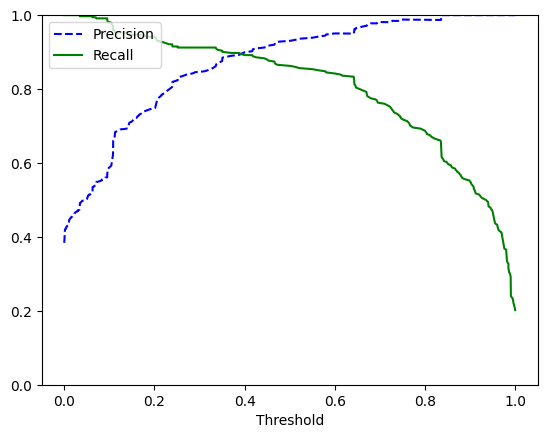

In [194]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
y_scores=random_forest.predict_proba(X_train)
y_scores=y_scores[:,1]
precisions,recalls,thresholds=precision_recall_curve(Y_train,y_scores)
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

In [197]:
thresholds=0.4
y_pred_new=(y_scores>thresholds)


In [198]:
from sklearn.metrics import classification_report
print(classification_report(Y_train,y_pred_new))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       549
           1       0.90      0.89      0.90       342

    accuracy                           0.92       891
   macro avg       0.92      0.91      0.92       891
weighted avg       0.92      0.92      0.92       891



In [196]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train,y_scores)

0.967285015818234